## Polinômio de Taylor
### Tn(x) = $\sum_{k=0}^{n} \frac{f^n(a)(x-a)^n}{n!}$

In [1]:
using Plots

In [2]:
function taylor_ordem_zero(x,a,f_a, m)
    # Dado um valor de x, um valor de a,f(a), e o maior valor 
    #que f'(t) assume no intervalo [a,x], retorna um y e um E tal que
    #|y - f(x)|<= E
    #No caso, o erro máximo com a aproximação usada é dado por
    #M * (x-a)
     y =  f_a  # (f(a) * (x-a)^0)/0!
     E = m*(x-a)
    return (y,E)
    
end

taylor_ordem_zero (generic function with 1 method)

In [3]:
#exemplo 1: f(x) = x^2 + 2x + 1;  f'(x) = 2x +2
a =1
x = 1.5
f_x = x^2 + 2*x + 1  #valor correto de f(x)
f_a = a^2 + 2*a + 1 #f(a) = 4
m = 2*1.5 + 2 #valor maximo da derivada entre 1 e 1.5
y,E = taylor_ordem_zero(x,a,f_a,m)

(4, 2.5)

In [4]:
abs(y - f_x) #espera-se que y - f(x) seja menor ou igual a 2.5

2.25

In [5]:
#exemplos 2 e 3: junto com taylor de ordem n

In [6]:
function taylor_ordem_um(x,a,f_a, f_linha_a, m)
    # Dado um valor de x, um valor de a,f(a),f'(a), e o maior valor 
    #que f''(t) assume no intervalo [a,x], retorna um y e um E tal que
    #|y - f(x)|<= E
    #No caso, o erro máximo com a aproximação usada é dado por
    #(M * (x-a)^2)/2
     y =  f_a + f_linha_a*(x-a) #(f(a)*(x-a)^0)/0! + (f'(a)*(x-a)^1)/1! 
     E = (m*(x-a)^2)/2  
    return (y,E)
    
end

taylor_ordem_um (generic function with 1 method)

In [7]:
#exemplo 1: f(x) = x^2 + 2x + 1;  f'(x) = 2x +2; f'' = 2
a =1
x = 1.5
f_x = x^2 + 2*x + 1  #valor correto de f(x)
f_a = a^2 + 2*a + 1 #f(a) = 4
f_linha_a = 2*a + 2
m = 2
y,E = taylor_ordem_um(x,a,f_a,f_linha_a,m)

(6.0, 0.25)

In [8]:
abs(y - f_x) #espera-se que y - f(x) seja menor ou igual a 0.25

0.25

In [9]:
#exemplos 2 e 3: junto com taylor de ordem n

In [10]:
function taylor_ordem_dois(x,a,f_a, f_linha_a,f_duas_linhas_a, m)
    # Dado um valor de x, um valor de a,f(a),f'(a),f''(a), e o maior valor 
    #que f'''(t) assume no intervalo [a,x], retorna um y e um E tal que
    #|y - f(x)|<= E
    #No caso, o erro máximo com a aproximação usada é dado por
    #(M * (x-a)^3)/3!
     y =  f_a + f_linha_a*(x-a) + (f_duas_linhas_a*(x-a)^2)/2 #(f(a)*(x-a)^0)/0! + (f'(a)*(x-a)^1)/1!
                                                              # + (f''(a)*(x-a)^2)/2!
     E = (m*(x-a)^3)/6  #(M * (x-a)^3)/3!    
    return (y,E)
    
end

taylor_ordem_dois (generic function with 1 method)

In [11]:
#exemplo 1: f(x) = x^2 + 2x + 1;  f'(x) = 2x +2; f'' = 2; f'''(x) = 0
a =1
x = 1.5
f_x = x^2 + 2*x + 1  #valor correto de f(x)
f_a = a^2 + 2*a + 1 #f(a) = 4
f_linha_a = 2*a + 2
f_duas_linhas_a = 2
m = 0 #como f'''(x) = 0, esperamos nenhum erro!!
y,E = taylor_ordem_dois(x,a,f_a,f_linha_a,f_duas_linhas_a,m)

(6.25, 0.0)

In [12]:
f_x  

6.25

In [13]:
#exemplos 2 e 3: junto com taylor de ordem n

In [14]:
function taylor_ordem_n(x,a,f_a, derivadas, m, ordem)
    #entradas: x, a, informações sobre f(a) e as derivadas em a,
    #e o maior valor da derivada f^(ordem+1)(t) no intervalo [a,x]
    #saída: y e E, onde
    #(especificação): |y - f(x)|<= E
    #y é o somatorio de k=0 até k=ordem de (f^(k)(a) * (x-a)^k )/k!, onde
    #f^(k)(a) é a k-ésima derivada
    #O erro E é dado por:
    # (m *(x-a)^(ordem+1))(ordem+1)!
    y = f_a 
    E = 1   #E = (m*(x-a)^(ordem+1))/(ordem+1)!
    quociente = 1 #é a parte do ((x-a)^k)/k!
    for k=1:ordem
        E*= (x-a)/(k) #calculando o erro por partes para evitar overflow
         quociente *= (x-a)/k #atualizando o quociente por partes para evitar overflow
        y += derivadas[k]*quociente  #f^k(a)* ((x-a)^k)/k! 
        
       
         
    end
    
    E *= m*((x-a)/(ordem+1))
    return (y,E)
end

taylor_ordem_n (generic function with 1 method)

In [15]:
#exemplo 1: f(x) = x^2 + 2x + 1;  f'(x) = 2x +2; f'' = 2; f'''(x) = 0
a =1
x = 1.5
f_x = x^2 + 2*x + 1  #valor correto de f(x)
f_a = a^2 + 2*a + 1 #f(a) = 4
f_linha_a = 2*a + 2
f_duas_linhas_a = 2
m = 0 #como f'''(x) = 0, esperamos nenhum erro!!
y,E = taylor_ordem_n(x,a,f_a,[f_linha_a,f_duas_linhas_a],m,2)
print("y = ",y)
print("\nE = ",E)
f_x == y #deve ser "true"

y = 6.25
E = 0.0

true

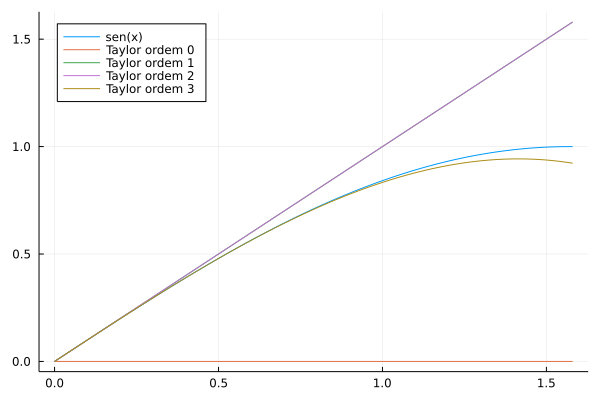

In [16]:
#exemplo 2: comparando a série de taylor de ordens 0, 1, 2 e 3 para sen(x) 
X = range(0, 1.58, length = 200) #até pi/2
Y_real = [sin(x) for x in X] 
Y0 = [] #para taylor de ordem 0
Y1 = [] #ordem 1
Y2 = [] #ordem 2
Y3 = [] #ordem 3
derivadas = [1,0,-1]
a = 0 #nosso intervalo para o polinômio de taylor vai de 0 a x, com x de 0 a pi/2
m = 1 #a derivada de seno é cosseno, cujo valor máximo é 1.
      #na verdade, todas as derivadas de seno tem, em módulo, valor máximo igual
      # a 1, pois sen'(x) = cos(x), cos'(x) = -sen(x), -sen'(x) = -cos(x), -cos'(x) = sen(x)
for x in X
     y, = taylor_ordem_zero(x,a,0,m) #sen(0) = 0
     push!(Y0,y)
    
     y, = taylor_ordem_um(x,a,0,1,m)  #sen'(0) = cos(0) = 1
     push!(Y1,y)    
    
     y, = taylor_ordem_dois(x,a,0,1,0,m)  #sen''(0) = -sen(0) = 0
     push!(Y2,y)                          #note que o 0 na segunda derivada
                                          #nulifica o terceiro termo da serie de taylor
                                          #((f''(a)(x-a)^2)/2), tornando-a igual ao taylor de ordem 1
     
     
     y, = taylor_ordem_n(x,a,0,derivadas,m,3)  #sen'''(0) = -cos(0) = 1
     push!(Y3,y)
     
end



plot(X,Y_real, label = "sen(x)", legend =:topleft)
plot!(X,Y0, label = "Taylor ordem 0") 
plot!(X,Y1, label = "Taylor ordem 1")
plot!(X,Y2, label = "Taylor ordem 2") #lembrando que será igual ao de ordem 1
plot!(X,Y3, label = "Taylor ordem 3")

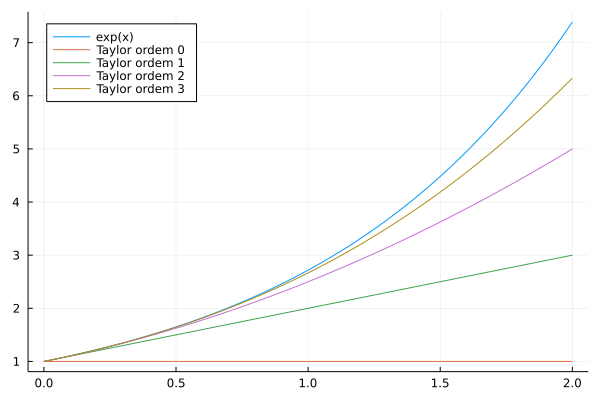

In [17]:
#exemplo 3: comparando a série de taylor de ordens 0, 1, 2 e 3 para e^x 
X = range(0, 2, length = 200) 
Y_real = [exp(x) for x in X] 
Y0 = [] #para taylor de ordem 0
Y1 = [] #ordem 1
Y2 = [] #ordem 2
Y3 = [] #ordem 3
derivadas = [1,1,1] #qualquer derivada de e^a é e^a, e no caso a = 0 
a = 0 #nosso intervalo para o polinômio de taylor vai de 0 a x, com x de 0 a 2
m = 9 # e<3, e o x vai até 2. Como qualquer derivada de e^x = e^x, 
       #no intervalo [0,2], nenhuma derivada será maior que 3^2, ou seja, 9
for x in X
     y, = taylor_ordem_zero(x,a,1,m) #e^0 = 1
     push!(Y0,y)
    
     y, = taylor_ordem_um(x,a,1,1,m)  
     push!(Y1,y)    
    
     y, = taylor_ordem_dois(x,a,1,1,1,m)  
     push!(Y2,y)                          
     
     
     y, = taylor_ordem_n(x,a,1,derivadas,m,3)  
     push!(Y3,y)
     
end



plot(X,Y_real, label = "exp(x)", legend =:topleft)
plot!(X,Y0, label = "Taylor ordem 0") 
plot!(X,Y1, label = "Taylor ordem 1")
plot!(X,Y2, label = "Taylor ordem 2") 
plot!(X,Y3, label = "Taylor ordem 3")

## Encontrando raiz aproximadamente
### 1 - Método da bisseção

In [18]:
function média(x,y)
    #Função implementada em aula 
    return (x+y)/2
end

média (generic function with 1 method)

In [19]:
function tem_sinais_opostos(f,a,b) #função recebe f(a) e f(b) não nulos
    #Função implementada em aula 
    return f(a)*f(b) < 0
end

tem_sinais_opostos (generic function with 1 method)

In [20]:
function é_raiz(f,a)
    #Função implementada em aula 
    return f(a)==0
end

é_raiz (generic function with 1 method)

In [21]:
function bissecao(f,a,b,erro) 
#especificação: dado a e b tal que f(a) e f(b) tem sinais opostos 
#retorna x_final tal que |x_final - x_c| <= erro com f(x_c)=0 
    
    if é_raiz(f,a)  
        return a
    end
    if é_raiz(f,b)
        return b
    end
    if !(tem_sinais_opostos(f,a,b))
        return "Não tem sinais opostos"   
    end
    
    iterações = ceil(log2((b-a)/erro))-1   #isso porque o intervalo cai pela metade a cada iteração 
    for i=1:iterações
        m=média(a,b)
        if é_raiz(f,m)
            return m
        end
        
        if tem_sinais_opostos(f,a,m)
            b=m
        else
            a=m
        end
    end
    
    x_final=média(a,b)
    return x_final
end

bissecao (generic function with 1 method)

In [22]:
#exemplo 1: x^3 
function x_ao_cubo(x) #sabemos que a raiz é quando x = 0
    return x^3
end

chute = bissecao(x_ao_cubo, -2,5, 0.001) #f(-2)= -8 e f(5) = 125 tem sinais opostos
#como o zero da função é quando x = 0, e queremos um erro maximo de 0.001, o método da
#bisseção deve nos retornar um numero menor do que 0.001

0.0003662109375

In [23]:
#exemplo 2: polinômio do quinto grau (sem fórmula fechada para a raiz!!)
function quinto_grau(x)
    return 2*x^5 +x^4 - 6*x^3 +2*x^2 - x + 4
end

a = -100
b=3

x = bissecao(quinto_grau,a,b,0.001)
print(quinto_grau(x)) #deve ser próximo de zero

-0.011306903333235141

In [24]:
#exemplo 3: número de ouro: raiz de x^2 - x - 1
function fib(x)
    return x^2 - x - 1
end
a = -0.5 #f(a) = -1.25
b = 3 #f(b) = 5, tem sinais opostos

bissecao(fib,a,b,0.00001) #deve ser próximo de ϕ

1.6180391311645508

### 2 - Método de Newton

In [25]:
function newton(f, derivada, chute, n_de_iteracoes) #recebe uma função, sua derivada, um chute inicial e o
    #número de iterações.
    #Aplica o método de newton à função recebida:
    #X_n+1 = f(X_n)/f'(X_n)
    #Se por ventura achamos uma raiz, a retornamos
    
    
    for i=1:n_de_iteracoes
        if (f(chute) == 0) #significa que já temos a raiz
          return chute
        end
        
        chute = chute - (f(chute)/(derivada(chute)) ) #Efetivamente o método de newton
    end
    
    return chute
end

newton (generic function with 1 method)

In [26]:
#exemplo 1: x^3 (usado no exemplo da bisseção)
function derivada_cubica(x)
    return 3*x^2
end
raiz = newton(x_ao_cubo, derivada_cubica, 2, 1000)
print("raiz aproximada: ", raiz)
print("\nf(raiz): ", x_ao_cubo(raiz) )

raiz aproximada: 9.620741997689759e-109
f(raiz): 0.0

In [27]:
#exemplo 2: número de ouro: raiz de x^2 - x - 1 
function polinomio(x)
    return x^2 - x - 1
end

function derivada(x)
    return 2*x - 1
end

#plot(polinomio)

newton(polinomio,derivada,1,1000) #deve retornar algo proximo de ϕ

1.618033988749895

In [28]:
#exemplo 3: x^2 (funçãos em sinais opostos: não funciona com a bisseção)
function x_ao_quadrado(x)
    return x^2
end

function derivada_x2(x)
    return 2*x
end

newton(x_ao_quadrado, derivada_x2, 5,100) #deve ser próximo de zero 

3.944304526105059e-30

## Interpolação polinomial
### 1- Lagrange

In [29]:
function lagrange(X,Y)
    #entrada: um vetor de valores de x, e um vetor de valores de y, que
    #representam os pontos (Xi, Yi) = (X[i], Y[i])
    #saída: um polinômio L(x) de grau n-1
    #especificação: para todo i entre 1 e n, L(X[i]) = Y[i]
    # 'n' é o número de pontos
    n = length(X)
    function L(x) #note que aqui o x é minúsculo, é apenas um número
        #a formula geral é 
        #L(x) = [y1 * ((x-x2)*(x-x3)*...*(x-xn))/(x1 - x2)*(x1-x3)*...*(x1-xn) ]  +
        #[y2 * ((x-x1)*(x-x3)*...*(x-xn))/(x2 - x1)*(x2-x3)*...*(x2-xn) ]+...+
        #[yn * ((x-x1)*(x-x2)*...*(x-x(n-1))/(xn - x1)*(xn-x2)*...*(xn-x(n-1)) ]
        #note que no termo com y1, o x_i não aparece no numerador, e também 
        #não é subtraido do proprio x_i no denominador, porque o objetivo é que
        #L(x) = y_i * 1 + 0 + 0... = y_i quando x = x_i
        y = 0
        for i=1:n 
            termo = Y[i]
            for j=1:n
                if (j!=i) 
                    termo *= (x - X[j])/(X[i] - X[j])
                end
            end
            y += termo
        end
        return y    
    end
    
    return L
end

lagrange (generic function with 1 method)

In [30]:
#exemplo: f(x) = ax^2 + bx + c
function f(x)
    return x^2 + 3x + 1
end

X = [1,2,3]
Y = [f(1), f(2), f(3)]
poli = lagrange(X,Y)
resultado = [poli(1), poli(2), poli(3)]
print(Y)
print("\n", resultado)

[5, 11, 19]
[5.0, 11.0, 19.0]

In [31]:
#exemplo 2: aproximando sqrt(x) com interpolação

x = [0,1,4,9,16]
y = [0,1,2,3,4]
poli = lagrange(x,y)
poli(3) - sqrt(3) #(deve ser próximo de zero)


0.1322349067168367

In [32]:
#exemplo 3: aproximando sen(x) com interpolação
x = [0,1,2,3,4,5,6]
y = [sin(i) for i in x]
poli = lagrange(x,y)
poli(3.14) - sin(3.14) #deve ser próximo de 0


0.0007950002794269669

### 2- Vandermonde

In [33]:
"""
Função que resolve e retorna Ax = b, quando A é uma matriz quadrada triangular superior.
Entradas: Matriz A, uma matriz quadrada triangular superior; Vetor B, uma matriz coluna.
Saídas: Vetor x, cujo elementos respeitam a equação Ax = b.
Complexidade: O(n^2)
"""
function resolve_triangular_superior(A, b)
    n = length(b) # Obtém o tamanho de b e armazena em n
    x = zeros(n) # Cria um vetor x de tamanho n
    for i = n:-1:1 # Faz i, que começa com valor n e diminui até 1
        x[i] = b[i] # Armazena em x_i o valor b_i
        for j = i+1:n # Dentro do for, faz o b_i menos o somatório de A_i,j * x_j, e armazenar em x_i,
                      # Com j que começa com valor i+1 e cresce até n
            x[i] = x[i] - (A[i,j]*x[j])
        end
        x[i] = x[i]/A[i, i] # Por fim, dividir o o x_i atual por A_i,i, e armazenar em x_i
    end
    return x # Retorna o vetor x
end

resolve_triangular_superior

In [34]:
"""
Função que resolve e retorna Ax = b, quando A é uma matriz quadrada triangular inferior.
Entradas: Matriz A, uma matriz quadrada triangular inferior; Vetor B, uma matriz coluna.
Saídas: Vetor x, cujo elementos respeitam a equação Ax = b.
Complexidade: O(n^2)
"""
function resolve_triangular_inferior(A, b)
    n = length(b) # Obtém o tamanho de b e armazena em n
    x = zeros(n) # Cria um vetor x de tamanho n
    for i = 1:n # Faz i, que começa com valor 1 e cresce até n
        x[i] = b[i] # Armazenda em x_i o valor b_i
        for j = 1:(i - 1)# Dentro do for, faz o b_i menos o somatório de A_i,j * x_j, e armazenar em x_i,
                         # Com j que começa com valor 1 e cresce até i - 1
            x[i] = x[i] - (A[i,j]*x[j])
        end
        
        x[i] = x[i]/A[i, i] # Por fim, dividir o o x_i atual por A_i,i, e armazenar em x_i
    end 
    return x # Retorna o vetor x
end

resolve_triangular_inferior

In [35]:
"""
Função que recebe uma matriz A e retorna duas matrizes: L, uma matriz quadrada triangular inferior,
e U, uma matriz quadrada triangular superior. Essas, quando multiplicadas, equivalem a A (L*U = A)
Entradas: Matriz A, uma matriz quadrada;
Saídas: Uma matriz quadrada triangular inferior, L; Uma matriz quadrada triangular superior, U.
Complexidade: O(n^3)
"""
function decomposicao_LU(A)
    n, = size(A) # Obtém o número de linhas e colunas em A e armazena em n
    L = zeros(n, n) # Cria uma matriz quadrada L de tamanho nxn vazia
    U = copy(A) # Copia a matriz A em U
    v = 0 # Variável auxiliar
    for i = 1:n # Preenche a diagonal principal da matriz L com o número 1
        L[i,i] = 1
    end
    for i = 1:(n - 1) # For que seleciona o 'pivo' para realiza a eliminação de Gauss, e formular valores de L
        pivo = U[i,i] # Salva o pivo retirado da matriz A
        for j = i + 1:n # Realiza o for, com j representando as linhas abaixo da linha do pivo, até n
            v = U[j, i]/pivo # Atualiza a variável auxiliar v para zerar os elementos em A de mesma coluna do pivo
            for k = 1:n # Realiza o for, passando por todos os itens da linha para realizar a eliminação gaussiana
                U[j,k] = U[j,k] - U[i,k]*(v) # Realiza a eliminação gaussiana, zerando sempre os elementos da coluna do pivo
            end
            L[j, i] = v # Armazena o valor calculado para a eliminação gaussiana 
        end
    end
    return L, U # Retorna L, como uma matriz quadrada triangular inferior,
                # e U, como uma matriz quadrada triangular superior
end

decomposicao_LU

In [36]:
"""
Função que recebe uma matriz A e retorna A invertida. 
(Utiliza o método A*A^(-1) = I <-> L*U*A^(-1) = I, onde temos U*A^(-1) = y)
Entradas: Matriz A, uma matriz quadrada;
Saídas: A_inv, Uma matriz quadrada que é a inversa de A.
Complexidade: O(n^3)
"""

function inversa_LU(A)
    L, U = decomposicao_LU(A)# 'Desmonta' a matriz A em duas matrizes, 
                           # L (quadrada triangular inferior) e U (quadrada triangular superior)
    n, = size(A) # Obtém o número de linhas e colunas em A e armazena em n
    y = zeros(n, n) # Cria uma matiz y, que será intermediária, e a preenche com zeros
    A_inv = zeros(n, n) # Cria a matriz que sera retornada, a inversa de A, e preenche com zeros
    ident = zeros(n, n) # Cria uma matriz identidade, e a preenche com zeros
    for i = 1:n # For para preencher a diagonal da matriz identidade com 1's
        ident[i,i] = 1
    end
    for i = 1:n # For que completa a matriz A invertida, das colunas 1 a n
        y[:,i] = resolve_triangular_inferior(L, ident[:,i]) # Resolve o triangular inferior com a coluna i da matriz identidade,
                                                            # no molde L*y_:,i = I_:,i
        A_inv[:, i] = resolve_triangular_superior(U, y[:,i])# Resolve o triangular superior com a coluna i da matriz y,
                                                            # no molde U*A_:,i = y_:,i
    end
    return A_inv # Retorna a matriz A invertida
end

inversa_LU (generic function with 1 method)

In [37]:
function vandermonde(x,y,grau) 
    #função auxiliar para afunção de interpolação/regressão
    #monta a matriz de vandermonde
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

vandermonde (generic function with 1 method)

In [38]:
function interpolacao_vandermonde(x,y)
    #entrada: n pontos (x_1,y_1)...(x_n,y_n).
    #saída: uma função f(x) de grau n-1
    #especificação: f(x_i) = y_i, para todo i, 1<=i<=n
    grau = length(x) - 1 #para interpolar n pontos precisamos de um polinômio de grau n-1
    V=vandermonde(x,y,grau)
    c = inversa_LU(V)*y
    n = length(x)
    function f(x)
        resultado = 0
        for i=1:n
            resultado += c[i]*(x^(i-1))
        end
        return resultado
    end
    
    return f
end

interpolacao_vandermonde (generic function with 1 method)

In [39]:
#exemplo 1: f(x) = ax^2 + bx + c
#o resultado deve ser igual ao exemplo de lagrange
function f(x)
    return x^2 + 3x + 1
end

X = [1,2,3]
Y = [f(1), f(2), f(3)]
poli = interpolacao_vandermonde(X,Y)
resultado = [polinomio(1), polinomio(2), polinomio(3)]
print(Y)
print("\n", resultado)

[5, 11, 19]
[-1, 1, 5]

In [40]:
#exemplo 2: aproximando sqrt(x) com interpolação
#o resultado deve ser igual ao exemplo de lagrange

x = [0,1,4,9,16]
y = [0,1,2,3,4]
poli = interpolacao_vandermonde(x,y)
poli(3) - sqrt(3) #(deve ser próximo de zero)

0.13223490671683713

In [41]:
#exemplo 3: aproximando sen(x) com interpolação
#o resultado deve ser igual ao exemplo de lagrange
x = [0,1,2,3,4,5,6]
y = [sin(i) for i in x]
poli = interpolacao_vandermonde(x,y)
poli(3.14) - sin(3.14) #deve ser próximo de 0

0.0007950002794740478

## Regressão Polinomial

In [42]:
function transposta(A)
    #função auxiliar
    #recebe uma matriz A e retorna sua transposta
    #transposta[j,i] = A[i,j]
    

    m = length(A[1, :]) #o numero de colunas é o tamanho do vetor que corresponde 
                        #a uma linha
    n = length(A[: , 1])
    
    trans = zeros(m,n) #m linhas, n colunas, porque é a transposta
    for i=1:n
        for j=1:m
            trans[j,i] = A[i,j]
        end
    end
    
    return trans
    
end

transposta (generic function with 1 method)

In [43]:
function minimos_quadrados(A, y)
    #Entrada: uma matriz A e um vetor y
    #saída: um vetor x
    #resolve aproximadamente o sistema linear Ax = y
    #a formula é dada por: 
    #(A^t)*A*x = (A^t)*y  => x = inv((A^t)*A))*((A^t)*y)  
    #(A^t é a transposta de A)
    #Podemos resolver com LU
    trans = transposta(A)
    m1 = trans*A
    m2 = trans*y
    x = inversa_LU(m1)*m2
    return x
    
end

minimos_quadrados (generic function with 1 method)

In [44]:
function regressão(x,y,grau) 
    V=vandermonde(x,y,grau)
    c = minimos_quadrados(V,y)
    #c=V\y #mínimos quadrados
    
    function f(x)
        resultado = 0
        for i=1:(grau+1)
            resultado += c[i]*(x^(i-1))
        end
        return resultado
    end
    
    return f
    
end

regressão (generic function with 1 method)

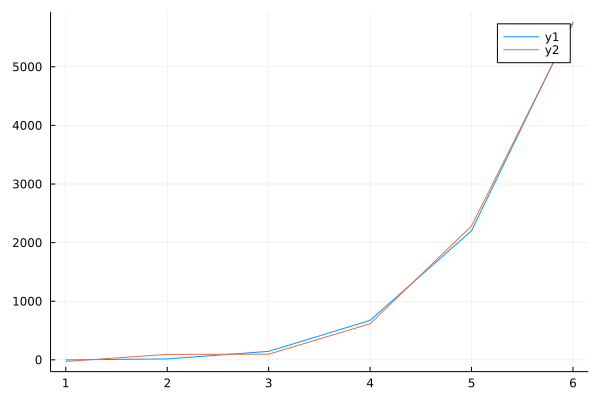

In [45]:
#exemplo 1: polinomio de grau 5 aproximado por grau 3
function grau_5(x)
    return x^5 - 2x^4 + 3x^3 - 2x^2 +x -2
end
x = [1,2,3,4,5,6]
y = [grau_5(1), grau_5(2), grau_5(3), grau_5(4), grau_5(5), grau_5(6)]
g = regressão(x,y,3)
y2 = [g(1), g(2), g(3), g(4), g(5), g(6)]
plot(x,y)
plot!(x,y2)

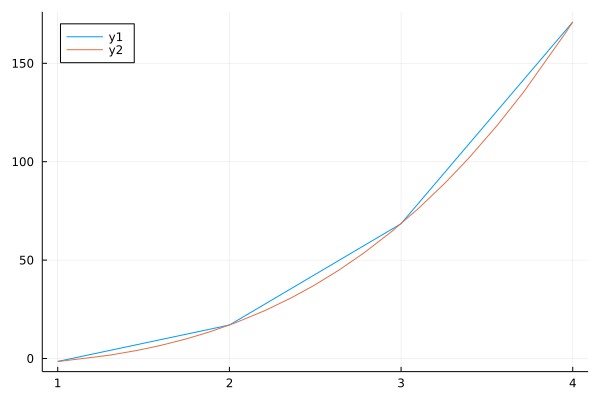

In [46]:
#exemplo 2: interpolação: caso específico da regressão 
function cubica(x)
    3x^3 - 1.5x^2 + 2x -5
end

X = [1,2,3,4]
Y = [cubica(x) for x in X]

poli = regressão(X,Y, 3)
plot(X,Y, legend=:topleft)
plot!(poli)  #deve ser igual ao plot anterior nos pontos 1,2,3,4


In [47]:
#exemplo 3: aproximando sen(x) , dessa vez com regressão
#o resultado deve ser igual ao exemplo de lagrange
x = [0,1,2,3,4,5,6,7,8,9,10]
y = [sin(i) for i in x]
poli = regressão(x,y,7)
poli(3.14) - sin(3.14) #deve ser próximo de 0

-0.02813887195818508

## Regressão com coeficientes lineares


In [48]:
function vandermonde_funcoes(x,y,funcoes)
    #função auxiliar
    #monta a matriz de vandermonde, dessa vez com os diferentes f(x) na matriz,
    #que não precisam mais ser obrigatoriamente x^p 
    n=length(x)
    V=zeros(n,length(funcoes))
    for i=1:n #linhas
        for j=1:length(funcoes)
            func = funcoes[j]
            V[i,j]= func(x[i]) #montando cada linha com f_1(x_i), f_2(x_i)...f_k(x_i)
        end
    end
    return V
end

vandermonde_funcoes (generic function with 1 method)

In [49]:
function regressão_coef_lineares(x,y,funcoes) 
    #entrada: um vetor x e um vetor y, representando n pontos (x[i], y[i]), e
    #um vetor de funções
    #saída: uma função f(x) = c1*funcoes[1](x) + c2*funcoes[2](x)...
    #...+ c_k*funcoes[k](x)
    #especificação: f(x[i]) ≈ y[i]
    V=vandermonde_funcoes(x,y,funcoes)
    c = minimos_quadrados(V,y)
    #c=V\y #mínimos quadrados
    
    function f(x)
        resultado = 0
        for i=1:length(funcoes)
            resultado += c[i]*(funcoes[i](x)) #f(x) = c1*f1(x) + c2*f2(x) ... + cn*fn(x)
        end
        return resultado
    end
    
    return f
    
end

regressão_coef_lineares (generic function with 1 method)

In [107]:
function regressão_coef_lineares_coeficientes(x,y,funcoes) 
    #entrada: um vetor x e um vetor y, representando n pontos (x[i], y[i]), e
    #um vetor de funções
    #saída: um vetor de números reais (coeficientes)
    #especificação: c[1]*funcoes[1](x[i]) + c[2]*funcoes[2](x[i])...
    #...+ c[k]*funcoes[k](x[i]) ≈ y[i]
    
    V=vandermonde_funcoes(x,y,funcoes)
    c = minimos_quadrados(V,y)
    #c=V\y #mínimos quadrados
    
    #function f(x)
     #   resultado = 0
      #  for i=1:length(funcoes)
       #     resultado += c[i]*(funcoes[i](x)) #f(x) = c1*f1(x) + c2*f2(x) ... + cn*fn(x)
        #end
        #return resultado
    #end
    
    #return f
    return c
end

regressão_coef_lineares_coeficientes (generic function with 1 method)

[10.060937685031263, -9.37144018871777, 3.126166945345643]

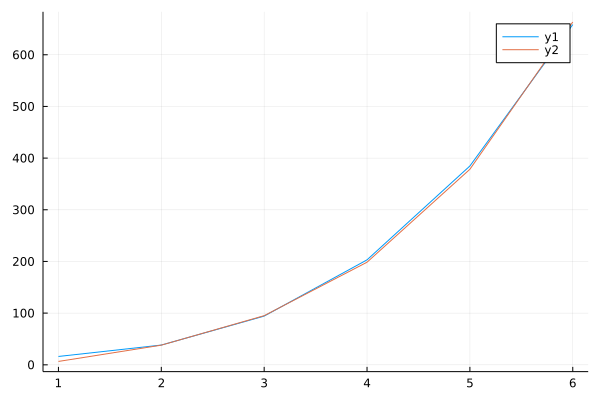

In [108]:
#exemplo 1: f(x) = c1*sen(x) +c2*cos(x) +c3*x^3
function seno(x)
    return sin(x)
end
function cosseno(x)
    return cos(x)
end

function potencia(x)
    return x^3
end
funcoes = [seno, cosseno, potencia]
function soma_funcoes(x)
    return 2*seno(x) -cosseno(x) + 3*potencia(x) + 12 #adicionando 12 para que a função 
                                                      #original fique um pouco diferente da
                                                      # regressão
end

x = [1,2,3,4,5,6]
y = [soma_funcoes(i) for i in x]
#y = [13,4,9,11,-1,6]
c = regressão_coef_lineares_coeficientes(x,y,funcoes)
print(c)
funcao = regressão_coef_lineares(x,y,funcoes)
y2 = [funcao(i) for i in x]
plot(x,y)
plot!(x,y2) #deveriam ser próximos

## Regressão com coeficientes não-lineares
### 1 - Modelo exponencial

In [52]:
function regressao_exponencial(x,y)
    #entrada: um vetor x e um vetor y, representando n pontos (x[i], y[i])
    #saida: uma função na forma f(x) = c1*e^(c2x)
    #especificação: f(x[i]) ≈ y[i]
    
    #dicionario : c1_barra = ln(c1)
    #c2_barra = c2
    #yi_barra = ln(y_i)
    #se y = c1*e^(c2*x), ln(y) = ln(c1) + c2*x
    #vamos usar minimos quadrados para determinar c1_barra e c2_barra, usando y_barra, isto é:
    #[1 x1
    #1  x2  * [c1_barra, c2_barra] = [y1_barra, y2_barra, ...]
    # ...]
    #depois, basta fazer e^(c1_barra) para obter c1
    
    #montando a matriz de vandermonde
    vandermonde = ones(length(x),2)
    y_barra = []
    for i=1:length(x)
        vandermonde[i,2] = x[i]
        #aproveitando pra montar o vetor y_barra
        push!(y_barra, log(y[i]))
    end
    
    #resolvendo aproximadamente o sistema
    c_barra = minimos_quadrados(vandermonde, y_barra)
    c = [exp(c_barra[1]), c_barra[2]] #transformando de volta
    #fazendo a função
    function f(x)
        return c[1]*exp(c[2]*x)
    end
    return f
end
    

regressao_exponencial (generic function with 1 method)

In [53]:
function regressao_exponencial_coef(x,y)
    #entrada: um vetor x e um vetor y, representando n pontos (x[i], y[i])
    #saida: coeficientes c1 e c2 de uma função na forma f(x) = c1*e^(c2x)
    #especificação: f(x[i]) ≈ y[i]
    
    #dicionario : c1_barra = ln(c1)
    #c2_barra = c2
    #yi_barra = ln(y_i)
    #se y = c1*e^(c2*x), ln(y) = ln(c1) + c2*x
    #vamos usar minimos quadrados para determinar c1_barra e c2_barra, usando y_barra, isto é:
    #[1 x1
    #1  x2  * [c1_barra, c2_barra] = [y1_barra, y2_barra, ...]
    # ...]
    #depois, basta fazer e^(c1_barra) para obter c1
    
    #montando a matriz de vandermonde
    vandermonde = ones(length(x),2)
    y_barra = []
    for i=1:length(x)
        vandermonde[i,2] = x[i]
        #aproveitando pra montar o vetor y_barra
        push!(y_barra, log(y[i]))
    end
    
    #resolvendo aproximadamente o sistema
    c_barra = minimos_quadrados(vandermonde, y_barra)
    c = [exp(c_barra[1]), c_barra[2]] #transformando de volta
    
    return c
end

regressao_exponencial_coef (generic function with 1 method)

coeficientes: [1.492446987430317, 0.9097200541858044]

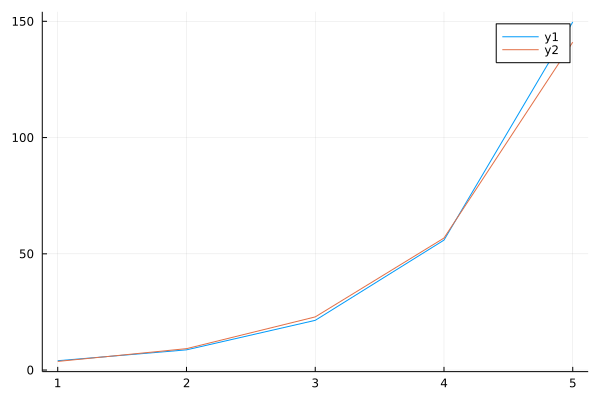

In [54]:
#exemplo 1: a própria função exponencial (com um pequeno "erro")
x = [1,2,3,4,5]
y = [(exp(i) + 1.3) for i in x] #1.3 para diferenciar as funções no plot
h = regressao_exponencial(x,y)
c = regressao_exponencial_coef(x,y)
print("coeficientes: ",c) #deveria ser perto de [1,1]
y2 = [h(i) for i in x]
plot(x,y)
plot!(x,y2) #os dois devem estar bem próximos no plot

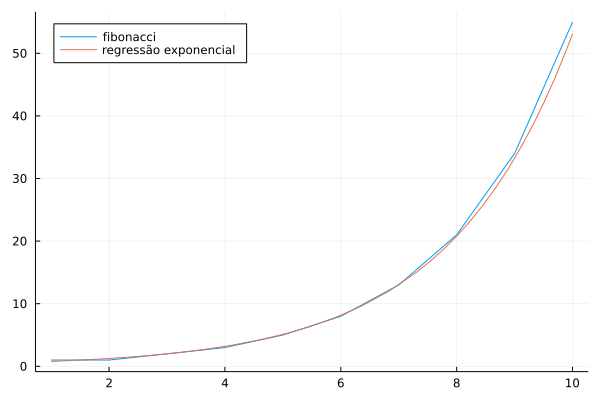

In [55]:
#exemplo 2: a função de fibonacci tem comportamento exponencial
function fibonacci(x) #fibonacci
    if (x<=2)
        return 1
    end
    
    return fibonacci(x-2) + fibonacci(x-1)
end

x = [1,2,3,4,5,6,7,8,9,10]
y = [fibonacci(i) for i in x]

funcao  = regressao_exponencial(x,y)
plot(x,y,legend =:topleft, label = "fibonacci")
plot!(funcao, label="regressão exponencial")

In [56]:
#exemplo 3: exponencial com coeficientes aleatorios
using Random

In [57]:
c1 = 3*rand(1)[1]
c2 = 3*rand(1)[1]
function randexp(x)
    
    return c1*exp(c2*x)
end

x = [1,2,3,4,5,6,7,8,9]
y = [randexp(i) for i in x]

c = regressao_exponencial_coef(x,y)
print("c1 original: ", c1)
print("; c1 regressão: ", c[1]) #deve ser próximo de c1

print("\nc2 original: ", c2)
print("; c2 regressão: ", c[2]) #deve ser próximo de c2


c1 original: 0.029905313404866796; c1 regressão: 0.029905313404866782
c2 original: 0.11511315195753302; c2 regressão: 0.11511315195753236

### 2 - Potência

In [58]:
function regressao_potencia(x,y)
    #entrada: um vetor x e um vetor y, representando n pontos (x[i], y[i])
    #saida: uma função na forma f(x) = c1*x^c2
    #especificação: f(x[i]) ≈ y[i]
    
    #dicionario : c1_barra = ln(c1)
    #c2_barra = c2
    #yi_barra = ln(y_i)
    #xi_barra = ln(x_i)
    #se y = c1*(x^c2), ln(y) = ln(c1) + c2*(ln(x))
    #vamos usar minimos quadrados para determinar c1_barra e c2_barra, usando y_barra, isto é:
    #[1 ln(x1)
    #1  ln(x2)  * [c1_barra, c2_barra] = [y1_barra, y2_barra, ...]
    # ...    ]
    #depois, basta fazer e^(c1_barra) para obter c1
    
    #montando a matriz de vandermonde
    vandermonde = ones(length(x),2)
    y_barra = []
    for i=1:length(x)
        vandermonde[i,2] = log(x[i])
        #aproveitando pra montar o vetor y_barra
        push!(y_barra, log(y[i]))
    end
    
    #resolvendo aproximadamente o sistema
    c_barra = minimos_quadrados(vandermonde, y_barra)
    c = [exp(c_barra[1]), c_barra[2]] #transformando de volta
    
    #fazendo a função
    function f(x)
        return c[1]*(x^c[2])
    end
    return f
end

regressao_potencia (generic function with 1 method)

In [59]:
function regressao_potencia_coef(x,y)
    #entrada: um vetor x e um vetor y, representando n pontos (x[i], y[i])
    #saida: uma função na forma f(x) = c1*x^c2
    #especificação: f(x[i]) ≈ y[i]
    
    #dicionario : c1_barra = ln(c1)
    #c2_barra = c2
    #yi_barra = ln(y_i)
    #xi_barra = ln(x_i)
    #se y = c1*(x^c2), ln(y) = ln(c1) + c2*(ln(x))
    #vamos usar minimos quadrados para determinar c1_barra e c2_barra, usando y_barra, isto é:
    #[1 ln(x1)
    #1  ln(x2)  * [c1_barra, c2_barra] = [y1_barra, y2_barra, ...]
    # ...    ]
    #depois, basta fazer e^(c1_barra) para obter c1
    
    #montando a matriz de vandermonde
    vandermonde = ones(length(x),2)
    y_barra = []
    for i=1:length(x)
        vandermonde[i,2] = log(x[i])
        #aproveitando pra montar o vetor y_barra
        push!(y_barra, log(y[i]))
    end
    
    #resolvendo aproximadamente o sistema
    c_barra = minimos_quadrados(vandermonde, y_barra)
    c = [exp(c_barra[1]), c_barra[2]] #transformando de volta
    
    #fazendo a função
    #function f(x)
     #   return c[1]*(x^c[2])
    #end
    return c
end

regressao_potencia_coef (generic function with 1 method)

coeficientes: [2.000000000000007, 2.9999999999999947]

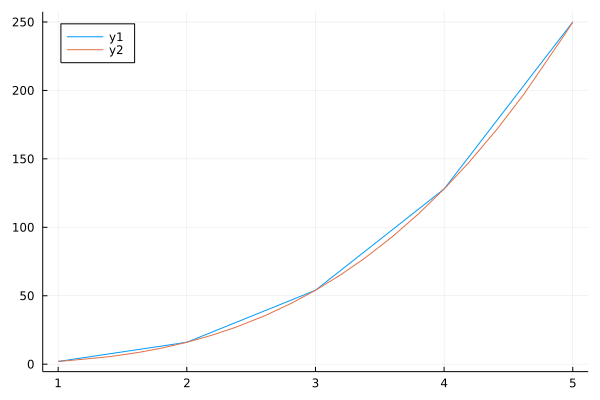

In [60]:
#exemplo 1: f(x) = 2x^3
function pot(x)
    return 2x^3
end

x = [1,2,3,4,5]
y = [pot(i) for i in x]

aproximacao = regressao_potencia(x,y)
c = regressao_potencia_coef(x,y)

print("coeficientes: ",c) #devem ser próximos de 2 e 3
plot(x,y, legend=:topleft)
plot!(aproximacao) #deve coincidir com a função original em 1,2,3,4,5

c1 original: 0.13981195114454592; c1 regressão: 0.36798463553262734
c2 original: 2.205853343452572; c2 regressão: 1.6458742634903971

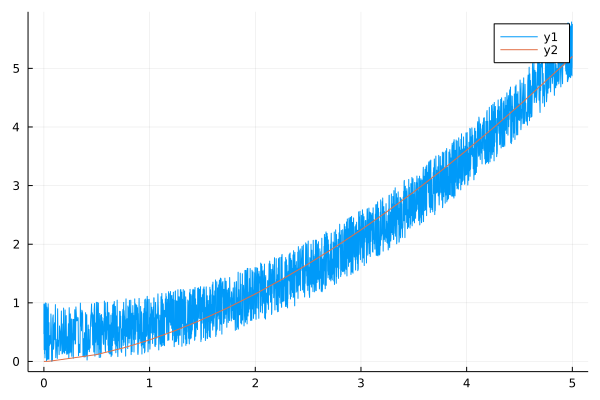

In [61]:
#exemplo 2: "interpolando" pontos de uma função similar com coeficientes aleatórios

c1 = 3*rand(1)[1]
c2 = 3*rand(1)[1]

function randpot(x)
   return c1*x^c2 + rand(1)[1] #algum pequeno erro (note que não é constante, pode mudar a cada vez)
end

x = [1,2,3,4,5,6,7]
y = [randpot(i) for i in x]

aprox = regressao_potencia(x,y)
c = regressao_potencia_coef(x,y)

print("c1 original: ", c1)
print("; c1 regressão: ", c[1]) #deve ser próximo de c1

print("\nc2 original: ", c2)
print("; c2 regressão: ", c[2]) #deve ser próximo de c2

plot(randpot)
plot!(aprox)

coeficientes: [0.801457167615558, 0.8472172840722565]

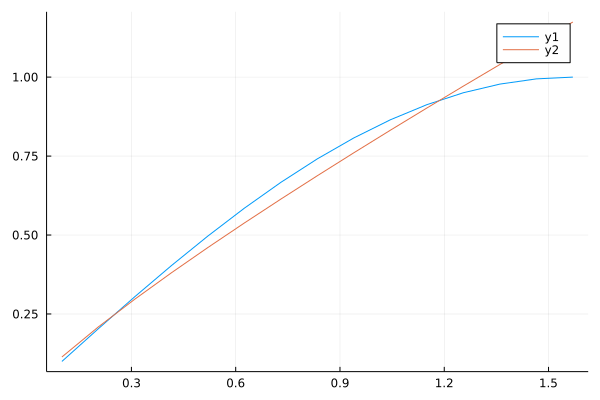

In [62]:
#exemplo 3: aproximando sen(x) com modelo da potencia

x = X = range(0.1, 1.57, length = 15) #até ~pi/2
y = [sin(i) for i in x]

aprox = regressao_potencia(x,y)
c = regressao_potencia_coef(x,y)
print("coeficientes: ", c)

plot(x,y)
plot!(x,[aprox(i) for i in x]) #deveriam ser relativamente próximos em alguns pontos


### 3 - Geométrica

In [63]:
function regressao_geometrica(x,y)
    #entrada: um vetor x e um vetor y, representando n pontos (x[i], y[i])
    #saida: uma função na forma f(x) = 1/(c1 + c2x)
    #especificação: f(x[i]) ≈ y[i]
    
    #dicionario
    #yi_barra = 1/(y_i)
    #se y = 1(c1 + c2x), 1/y = c1 + c2x
    #vamos usar minimos quadrados para determinar c1 e c2, usando y_barra, isto é:
    #[1 x1
    #1  x2  * [c1, c2] = [y1_barra, y2_barra, ...]
    # ...    ]
    
    
    #montando a matriz de vandermonde
    vandermonde = ones(length(x),2)
    y_barra = []
    for i=1:length(x)
        vandermonde[i,2] = x[i]
        #aproveitando pra montar o vetor y_barra
        push!(y_barra, 1/(y[i]))
    end
    
    #resolvendo aproximadamente o sistema
    c = minimos_quadrados(vandermonde, y_barra)
    
    #fazendo a função
    function f(x)
        return 1/(c[1] + c[2]*x)
    end
    return f
end

regressao_geometrica (generic function with 1 method)

In [99]:
function regressao_geometrica_coef(x,y)
    #entrada: um vetor x e um vetor y, representando n pontos (x[i], y[i])
    #saida: coeficientes c1 e c2 de uma função na forma f(x) = 1/(c1 + c2x)
    #especificação: f(x[i]) ≈ y[i]
    
    #dicionario
    #yi_barra = 1/(y_i)
    #se y = 1(c1 + c2x), 1/y = c1 + c2x
    #vamos usar minimos quadrados para determinar c1 e c2, usando y_barra, isto é:
    #[1 x1
    #1  x2  * [c1, c2] = [y1_barra, y2_barra, ...]
    # ...    ]
    
    
    #montando a matriz de vandermonde
    vandermonde = ones(length(x),2)
    y_barra = []
    for i=1:length(x)
        vandermonde[i,2] = x[i]
        #aproveitando pra montar o vetor y_barra
        push!(y_barra, 1/(y[i]))
    end
    
    #resolvendo aproximadamente o sistema
    c = minimos_quadrados(vandermonde, y_barra)
    
    #fazendo a função
    #function f(x)
     #   return 1/(c[1] + c[2]*x)
    #end
    #return f
end

regressao_geometrica_coef (generic function with 1 method)

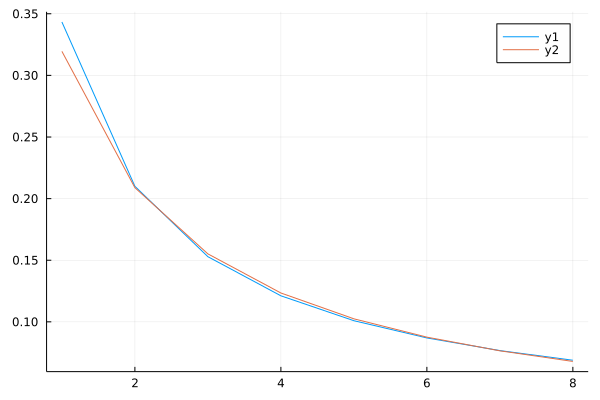

In [100]:
#exemplo 1: y = 1/(1 + 2x)

function inversa(x)
    return 1/(1 +2x) + 0.01 #pequeno "erro" para diferenciar os dois plots
end

x = [1,2,3,4,5,6,7,8]
y = [inversa(i) for i in x]

aprox = regressao_geometrica(x,y)

plot(x,y)
plot!(x,[aprox(i) for i in x])


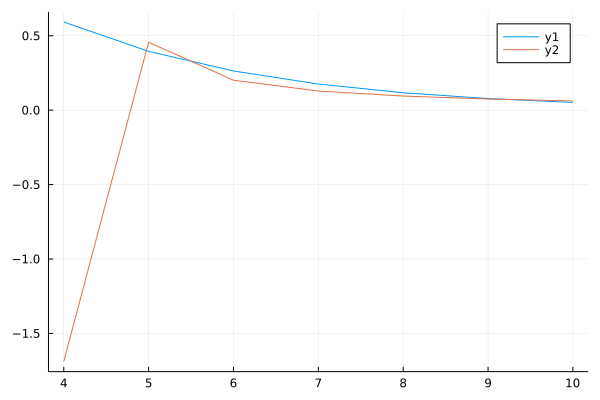

In [101]:
#exemplo 2: relação de recorrência com coeficiente menor que 1
function hiperbole(x)
    if(x <= 1)
        return 2  
    end
    return hiperbole(x-1)/1.5
end
    
x = [4,5,6,7,8,9,10]
y = [hiperbole(i) for i in x]
    
aprox = regressao_geometrica(x,y)

plot(x,y)
plot!(x, [aprox(i) for i in x])
    

coeficientes: -25.036649844271295, 22.179530613988028

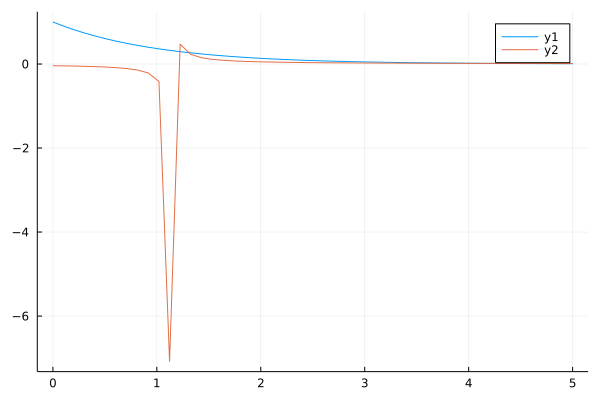

In [106]:
#exemplo 3: tentando aproximar 1/e^x (e^-x)
function inv_exp(x)
    return exp(-x)
end

x = range(0,5,length = 50)
y = [inv_exp(i) for i in x]

aprox = regressao_geometrica(x,y)
c = regressao_geometrica_coef(x,y)
print("coeficientes: ", string(c[1]), ", ", string(c[2])) 
plot(x,y)
plot!(x,[aprox(i) for i in x])
